

---
Par **Mr Abdoulaye Balde**

[LinkedIn](https://www.linkedin.com/in/abdoulayegk/) <br>
[Github](https://github.com/abdoulayegk/ODC-Formaton )  <br>
[Twitter](https://twitter.com/abdoulayegk)

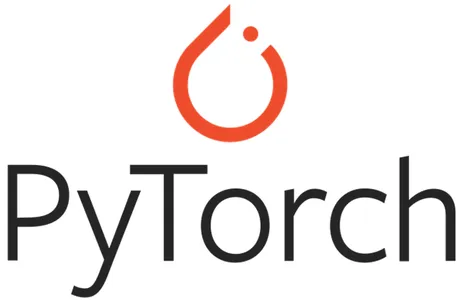

PyTorch est une bibliothèque open-source basée sur Python qui est largement utilisée pour la création de modèles d'apprentissage automatique, en particulier les réseaux de neurones. Il fournit un ensemble de fonctionnalités qui facilitent la création, la formation et le déploiement de modèles d'apprentissage automatique.

La base de PyTorch est le concept de tenseur, qui est essentiellement un tableau multidimensionnel. Les tenseurs sont similaires aux tableaux Numpy, mais ils ont la particularité d'être compatibles avec les calculs sur les GPU, ce qui permet d'accélérer les opérations lorsque les ressources de calcul sont disponibles.

# Pytorch Installation avec conda

```bash
conda install pytorch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 cpuonly -c pytorch
```

# Tensor
PyTorch représente les données sous forme de tableaux multidimensionnels, similaires aux tableaux NumPy, appelés **tenseurs**.

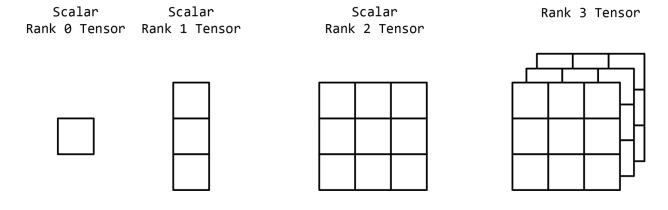

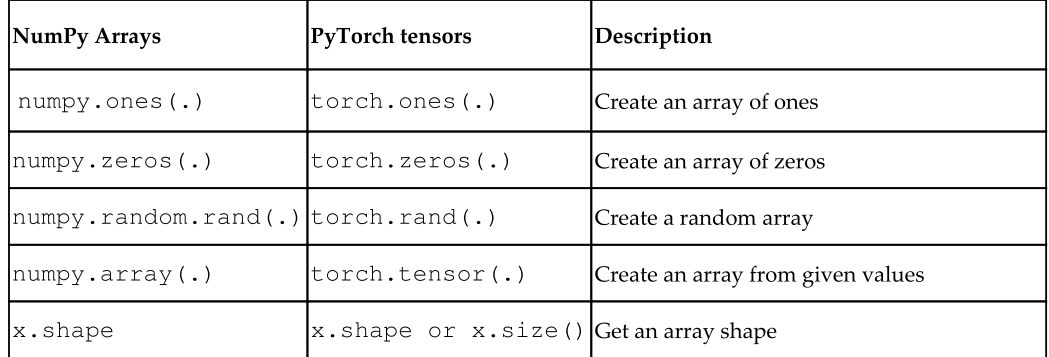

In [ ]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

In [ ]:
import torch
describe(torch.Tensor(2, 3))

In [ ]:
describe(torch.rand(2, 3))  # uniform random

In [ ]:
describe(torch.randn(2, 3))# random normal

In [ ]:
x = torch.ones(2, 3)
describe(x)

In [ ]:
# On peut aussi creer un tenseur avec de valeur specique en utilisant fill_
x.fill_(5)
describe(x)

### . Creating and initializing a tensor from NumPy

In [ ]:

import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

### Convert the tensor into a NumPy array:




In [ ]:
y=x.numpy()
print(y)
print(y.dtype)

### Tensor Types and Size

In [ ]:
xy = torch.FloatTensor(
    [[1, 2, 3],
    [4, 5, 6]])
describe(xy)

In [ ]:
yz= torch.LongTensor(
    [[1, 2, 3],
    [4, 5, 6]])

describe(yz)

In [ ]:
xs = torch.tensor(
    [[1, 2, 3],
    [4, 5, 6]],
    dtype=torch.int64
    )


describe(xs)

In [ ]:
x = torch.arange(6)

describe(x)

In [ ]:
[1,2,3,4]*2

In [ ]:
x*2

In [ ]:
xs = x.view(2,3) # Equivalent de reshape avec numpy

describe(xs)

Vous pouvez meme additioner les element en faisant la somme de chaque colonne.

In [ ]:
describe(torch.sum(xs, dim=0))

ICI on fait la somme des element par ligne pour obtenir un tenseur

In [ ]:
describe(torch.sum(xs, dim=1))

# Utilisation de GPU

In [ ]:
# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

Cette commande exécutera l'utilitaire nvidia-smi, qui affiche l'état et les informations de la carte graphique, y compris le modèle de la carte, son utilisation, l'utilisation de la mémoire, et plus encore.

Notez que pour exécuter cette commande, vous devez avoir sélectionné une exécution avec GPU dans Colab. Vous pouvez le faire en accédant à "Runtime" -> "Change runtime type" et en sélectionnant "GPU" comme accélérateur matériel.

In [ ]:
!nvidia-smi

In [ ]:
x = torch.rand(3, 3).to(device)


describe(x)


In [ ]:
b = torch.rand(3,3)
describe(b)

**Note** On peut pas faire des operation mathematique sur des tenseurs qui ne sont pas dans le meme environement. il faut qu'il soit dans **CPU ou GPU**

In [ ]:
x+b

# Image en couleur

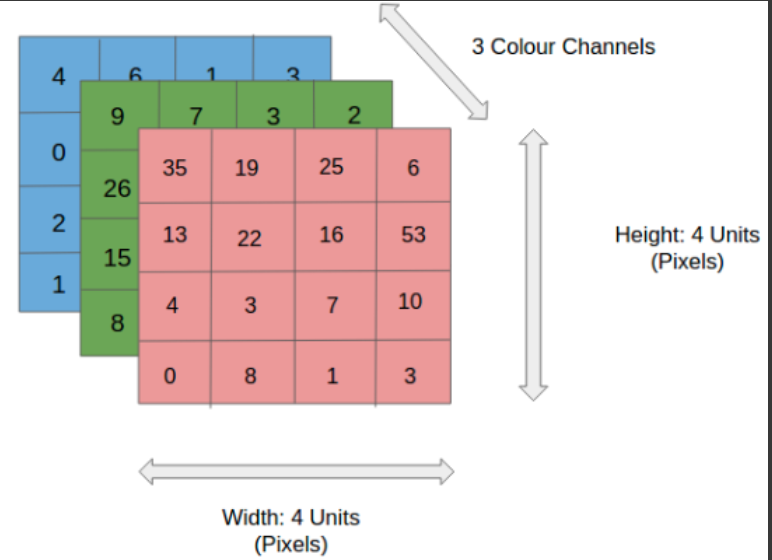

### Automatique differenciation

Example de derive de ou x = 1

$$f(x) = 3*(x + 2)^2$$


We can then calculate the derivative (with respect to x)

$$f'(x) = 6*(x + 2)$$

$$f'(1) = 6*(1 + 2) = 18$$

In [ ]:
x = torch.ones(2,2, requires_grad=True)
y = x + 2
z = y**2 * 3
z = z.mean()

z.backward()
print("Averagae Gradient")
print(x.grad.sum())

---
L’ensemble de données que nous allons utiliser est très connu par les data scientists, il s’agit du Dataset MNIST, ce dernier rassemble près de 60000 images de 28×28 pixels de nombres écrits à la main avec les nombres en numérique comme variable cible. L’objectif de notre modèle sera de reconnaître le nombre écrit sur l’image.
---

In [ ]:
### IMPORTS ###
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import time

In [ ]:
### LOAD DATA ###
train = torchvision.datasets.MNIST('../data', train=True, download=True,
                      transform=transforms.Compose([ ### CONVERT ARRAY TO TENSOR
                          transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('../data', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


print(train)

In [ ]:
### Iterate Once ###
for image, label in train:
    print(image.shape)
    print(label)
    break

### Iterate and Display Images ###
counter = 0
for image, label in train:
    if counter == 6:
        break
    image = image.squeeze().numpy()
    print("Image Label:", label)
    plt.imshow(image, cmap="gray")
    plt.show()
    counter += 1

In [ ]:
BATCH_SIZE = 128
LOSS = nn.CrossEntropyLoss() # We use CrossEntropy for multi-class classification problems
LR = 0.008
EPOCHS = 5

In [ ]:
### Build DataLoaders ###
trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for images, labels in trainset:
    print(images.shape)
    print(labels)
    break

In [ ]:
class FCNet(nn.Module): # Inherit in nn.Module Class
    def __init__(self):
        super().__init__() # initialize the nn.Module Class
        self.fc1 = nn.Linear(28*28, 64) # input flattened 28*28 into 64 node layer
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # Output to 10 neurons as we have 10 options

    def forward(self, x):
        """
        Activation Function: ReLU
        """
        x = x.view(-1, 28*28) # reshape to flaten our batch*28*28 to be batch*784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#     x = F.log_softmax(self.fc4(x), dim=1) This is wrong, our loss expectects logits not probabilities
        x = self.fc4(x)
        return x

In [ ]:
# Declare Model
model = FCNet()
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

print("Time On CPU for Model Training: {}".format(time.time() - start))

In [ ]:
correct = 0
total = 0

model.eval()

with torch.no_grad(): # Do not update weights with test data
    for data in testset:
        X, y = data
        forward_out = model(X)

        for idx, i in enumerate(forward_out):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total, 2))

# GPU Acceleration

In [ ]:
%time
# Declare Model (And Place on Device)
model = FCNet().to(device)
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device) # (Place the X and Y tensor on Device)
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

### Due to the simplicty of the model we arent seeing huge gains here! This will quickly change later...
print("Time On GPU for Model Training: {}".format(time.time() - start))